$\DeclareMathOperator{\d}{d}$
$\newcommand{\err}[3]{\Delta #1 =& #1\cdot\sqrt{\lr{\frac{\Delta #2}{#2}}^2 + \lr{\frac{\Delta #3}{#3}}^2}}$
$\newcommand{\lr}[1]{\left(#1\right)}$

# Protokoll PAP2 Versuch 253: Absorption von ionisierender Strahlung
Leonard Scheuer

## Motivation
In diesem Verusch soll die Apsorption von $\alpha$-,$\gamma$- und $\beta$-Strahlung in Materie gemessen werden. Aus den Messungen sollen schließlich die (Maximal)enegien der Strahlung bestimmt werden. 

## Grundlagen



## Auswertung


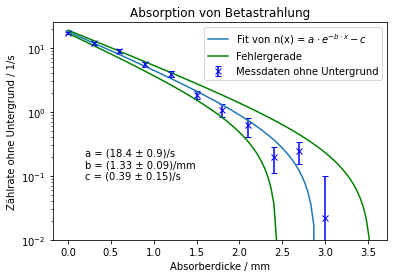

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.stats import chi2

def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

def expon(x, a, b, c):
    return a * np.exp(-b * x) - c

t1, x1, N1, N1_err = np.genfromtxt("v2.csv", delimiter = ';', skip_header = 1, converters = {0:comma_to_float, 1:comma_to_float, 2:comma_to_float, 3:comma_to_float}, unpack = True)

n1 = N1 / t1
n1_err = N1_err / t1

n1 = n1[:-3-1] - n1[-1]
n1_err = np.sqrt(n1_err[:-3-1]**2 + n1_err[-1]**2)

x1 = x1[:-3-1]

plt.errorbar(x1, n1, yerr = n1_err, label = 'Messdaten ohne Untergrund', capsize = 3, fmt = 'bx')
plt.yscale('log')
plt.xlabel('Absorberdicke / mm')
plt.ylabel('Zählrate ohne Untergrund / 1/s')
plt.title('Absorption von Betastrahlung')
plt.ylim(bottom = 10**(-2))

popt1, pcov1 = curve_fit(expon, x1, n1, sigma = n1_err)

s = np.linspace(x1[0], x1[-1] + 0.55, 100)

crit_min = np.array([popt1[0] - np.sqrt(pcov1[0][0]), popt1[1] + np.sqrt(pcov1[1][1]), popt1[2] + np.sqrt(pcov1[2][2])])
crit_max = np.array([popt1[0] + np.sqrt(pcov1[0][0]), popt1[1] - np.sqrt(pcov1[1][1]), popt1[2] - np.sqrt(pcov1[2][2])])

plt.plot(s, expon(s, *popt1), label = 'Fit von n(x) = $a\cdot e^{-b \cdot x}-c$')
plt.plot(s, expon(s, *crit_min), color = 'green', label = 'Fehlergerade')
plt.plot(s, expon(s, *crit_max), color = 'green')
plt.legend()
plt.text(0.2, 0.09, 'a = ({0:.1f} ± {1:.1f})/s\nb = ({2:.2f} ± {3:.2f})/mm\nc = ({4:.2f} ± {5:.2f})/s'.format(popt1[0], np.sqrt(pcov1[0][0]), popt1[1], np.sqrt(pcov1[1][1]), popt1[2], np.sqrt(pcov1[2][2])))

In [2]:
chi2_ = np.sum((expon(x1, *popt1) - n1)**2/ n1_err**2)
dof = len(n1) - 3
chi2_red = chi2_ / dof

print("chi^2 = {0:.1f}".format(chi2_))
print("chi^2_red = {0:.1f}".format(chi2_red))

chi^2 = 16.3
chi^2_red = 2.0


In [3]:
prob = round(1 - chi2.cdf(chi2_, dof), 2) * 100
print("Fitwahrscheinlichkeit: {0}%".format(prob))

Fitwahrscheinlichkeit: 4.0%


In [4]:
x_crit1 = np.log(popt1[0] / popt1[2]) / popt1[1]
x_crit1_err = np.max(np.array([np.abs(np.log(crit_min[0] / crit_min[2]) / crit_min[1] - x_crit1), np.abs(np.log(crit_max[0] / crit_max[2]) / crit_max[1] - x_crit1)]))

print('Maximalreichweite: ({0:.1f} ± {1:.1f})mm'.format(x_crit1, x_crit1_err))

Maximalreichweite: (2.9 ± 0.6)mm


In [5]:
rho_Al = 2.6989
R_ES = 0.130

print('Flächendichte: ({0:.2f} ± {1:.2f})g/cm^2'.format(R_ES + rho_Al * x_crit1 / 10, rho_Al * x_crit1_err / 10))

Flächendichte: (0.91 ± 0.18)g/cm^2


In [6]:
print('Abweichung maximale Energie zum Literaturwert: {0:.1f} sigma'.format((2.274 - 2)/0.2))

Abweichung maximale Energie zum Literaturwert: 1.4 sigma


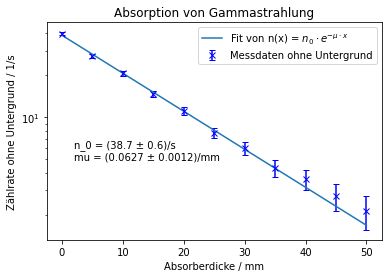

In [7]:
def lambert_beer(x, n_0, mu):
    return n_0 * np.exp(- mu * x)

n0 = 91 / (5 * 60) #in 1/s
n0_err = np.sqrt(n0)

t2, x2, N2, N2_err = np.genfromtxt("v3.csv", delimiter = ';', skip_header = 1, converters = {0:comma_to_float, 1:comma_to_float, 2:comma_to_float, 3:comma_to_float}, unpack = True)

n2 = N2 / t2
n2_err = N2_err / t2

n2 = n2 - n0
n2_err = np.sqrt(n2_err**2 + n0_err**2)

plt.errorbar(x2, n2, yerr = n2_err, label = 'Messdaten ohne Untergrund', capsize = 3, fmt = 'bx')
plt.yscale('log')
plt.xlabel('Absorberdicke / mm')
plt.ylabel('Zählrate ohne Untergrund / 1/s')
plt.title('Absorption von Gammastrahlung')

popt2, pcov2 = curve_fit(lambert_beer, x2, n2, sigma = n2_err, p0 = (38.7, 0.063))

s = np.linspace(x2[0], x2[-1], 100)

plt.plot(s, lambert_beer(s, *popt2), label = 'Fit von n(x) = $n_0\cdot e^{-\mu \cdot x}$')
plt.legend()
plt.text(2, 5, 'n_0 = ({0:.1f} ± {1:.1f})/s\nmu = ({2:.4f} ± {3:.4f})/mm'.format(popt2[0], np.sqrt(pcov2[0][0]), popt2[1], np.sqrt(pcov2[1][1])))
#plt.savefig('253-6.jpeg')

In [8]:
chi2_ = np.sum((lambert_beer(x2, *popt2) - n2)**2/ n2_err**2)
dof = len(n2) - 2
chi2_red = chi2_ / dof

print("chi^2 = {0:.1f}".format(chi2_))
print("chi^2_red = {0:.1f}".format(chi2_red))

chi^2 = 4.5
chi^2_red = 0.5


In [9]:
prob = round(1 - chi2.cdf(chi2_, dof), 2) * 100
print("Fitwahrscheinlichkeit: {0}%".format(prob))

Fitwahrscheinlichkeit: 88.0%


In [10]:
rho_Pb = 11.342

k = popt2[1] / rho_Pb * 10
k_err = np.sqrt(pcov2[1][1]) / rho_Pb * 10

print('Massenschwächungskoeffizient: ({0:.4f} ± {1:.4f})cm^2/g'.format(k, k_err))

Massenschwächungskoeffizient: (0.0553 ± 0.0011)cm^2/g


In [11]:
print('Abweichung maximale Energie zum Literaturwert: {0:.1f} sigma'.format((1.333 - 0.9)/0.1))
print('Oder: Abweichung maximale Energie zum Literaturwert: {0:.1f} sigma'.format((1.173 - 0.9)/0.1))

Abweichung maximale Energie zum Literaturwert: 4.3 sigma
Oder: Abweichung maximale Energie zum Literaturwert: 2.7 sigma


In [12]:
A_lit = 3.7 * 0.5**(7/5.272)

r = 1.4 / 2
r_err = 0.1 / 2

l = 4.0
l_err = 0.1

eps = 0.04
eps_err = 0.01

d, d_err, n3, n3_err = np.genfromtxt("v4.csv", delimiter = ';', skip_header = 1, converters = {0:comma_to_float, 1:comma_to_float, 2:comma_to_float, 3:comma_to_float}, unpack = True)

n3 = (n3 / 60 - n0) * 10**(-6) #in MBq
n3_err = np.sqrt((n3_err / 60)**2 + n0_err**2) * 10**(-6)

A = 4 * n3 * d**2 / r**2 / eps
A_err = A * np.sqrt((2 * d_err/d)**2 + (2 * r_err/r)**2 + (eps_err/eps)**2 + (n3_err / n3)**2)

print('A_lit =', A_lit)
print('A =', A, 'kBq')
print('A_err =', A_err, 'kBq')
print('Abweichung:', np.abs(A - A_lit)/A_err, 'sigma')

A_lit = 1.4740198198793963
A = [2.07923469 2.50741497 2.77178571 2.77795918] kBq
A_err = [0.72907589 0.76497655 0.82088997 0.81593429] kBq
Abweichung: [0.83011231 1.35088473 1.58092551 1.5980936 ] sigma


In [13]:
k1 = (1 + l / (2 * d))**2
k1_err = (1 + l / (2 * d)) * l / d * np.sqrt((l_err / l)**2 + (d_err / d)**2)

A1 = k1 * A
A1_err = A1 * np.sqrt(4 * (d_err**2 + l_err**2 / 2) / (d + l / 2)**2 + (2 * r_err/r)**2 + (eps_err/eps)**2 + (n3_err / n3)**2)

print('k_1 = ',k1)
print('k_1_err = ',k1_err)
print('A_1 =', A1, 'kBq')
print('A_1_err =', A1_err, 'kBq')
print('Abweichung:', np.abs(A1 - A_lit)/A1_err, 'sigma')

k_1 =  [1.96       1.44       1.28444444 1.21      ]
k_1_err =  [0.11544696 0.02683282 0.01259259 0.00777817]
A_1 = [4.0753     3.61067755 3.56020476 3.36133061] kBq
A_1_err = [1.31278522 1.08416955 1.04887322 0.98503167] kBq
Abweichung: [1.98149715 1.97077821 1.98897722 1.91598997] sigma


In [14]:
rho_PK = 7.9

x = 1.4
x_err = 0.1

mu = k * rho_PK
mu_err = rho_PK * k_err

print('mu = ({0:.3f} ± {1:.3f})/cm'.format(mu, mu_err))

mu = (0.437 ± 0.008)/cm


In [15]:
k2 = np.exp(k * x)
k2_err = k2 * np.sqrt((x * k_err)**2 + (k * x_err)**2)

A2 = k2 * A1
A2_err = A2 * np.sqrt((k2_err / k2)**2 + (A1_err / A1)**2)

print('k_2 = ',k2)
print('k_2_err = ',k2_err)
print('A_2 =', A2, 'kBq')
print('A_2_err =', A1_err, 'kBq')
print('Abweichung:', np.abs(A2 - A_lit)/A2_err, 'sigma')

k_2 =  1.080436300823556
k_2_err =  0.006180695076299031
A_2 = [4.40310206 3.9011071  3.84657446 3.63170361] kBq
A_2_err = [1.31278522 1.08416955 1.04887322 0.98503167] kBq
Abweichung: [2.06476319 2.07162059 2.09320711 2.02700914] sigma


m = (-94 ± 4)/mbar/s
n = (46414 ± 1741)/s


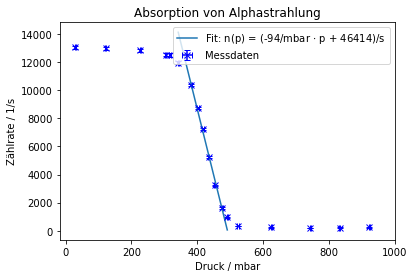

In [16]:
def line(x, m, b):
    return m * x + b

p, p_err, n4, n4_err = np.genfromtxt("v5.csv", delimiter = ';', skip_header = 1, converters = {0:comma_to_float, 1:comma_to_float, 2:comma_to_float, 3:comma_to_float}, unpack = True)

n3 = n3 / 60 #in Bq
n3_err = n3_err / 60

plt.errorbar(p, n4, xerr = p_err, yerr = n4_err, label = 'Messdaten', capsize = 3, fmt = 'bx')
plt.xlabel('Druck / mbar')
plt.ylabel('Zählrate / 1/s')
plt.title('Absorption von Alphastrahlung')
plt.xlim(right = 1000)

popt4, pcov4 = curve_fit(line, p[6:12], n4[6:12], sigma = n4_err[6:12])
plt.plot(p[5:13], line(p[5:13], *popt4), label = 'Fit: n(p) = ({0:.0f}/mbar $\cdot$ p + {1:.0f})/s'.format(popt4[0], popt4[1]))
plt.legend()

print('m = ({0:.0f} ± {1:.0f})/mbar/s'.format(popt4[0], np.sqrt(pcov4[0][0])))
print('n = ({0:.0f} ± {1:.0f})/s'.format(popt4[1], np.sqrt(pcov4[1][1])))

In [17]:
n_12 = 6540
n_12_err = 60

p_12 = (n_12 - popt4[1]) / popt4[0]
p_12_err = p_12 * np.sqrt(pcov4[0][0] / popt4[0]**2 + (n_12_err**2 + pcov4[1][1]) / (n_12 - popt4[1])**2)

print('Druck bei halber Zählrate: ({0:.0f} ± {1:.0f})mbar'.format(p_12, p_12_err))

Druck bei halber Zählrate: (422 ± 25)mbar


In [18]:
s_0 = 4.2
s_0_err = 0.1

p0 = 1013

s_1 = p_12 * s_0 / p0
s_1_err = s_1 * np.sqrt((p_12_err / p_12)**2 + (s_0_err / s_0)**2)

print('s_1 = ({0:.2f} ± {1:.2f})cm'.format(s_1, s_1_err))

s_1 = (1.75 ± 0.11)cm


In [19]:
rho_gl = 2.25
rho_gl_err = 0.01

s_2 = s_1 + rho_gl / 1.43
s_2_err = np.sqrt(s_1_err**2 + (rho_gl_err / 1.43)**2)

print('s_2 = ({0:.2f} ± {1:.2f})cm'.format(s_2, s_2_err))

s_2 = (3.32 ± 0.11)cm


In [20]:
s = s_2 + 0.68
s_err = s_2_err

print('s = ({0:.2f} ± {1:.2f})cm'.format(s, s_err))

s = (4.00 ± 0.11)cm


In [21]:
print('Abweichung maximale Energie zum Literaturwert: {0:.2f} sigma'.format((5.5 - 5.48)/0.5))

Abweichung maximale Energie zum Literaturwert: 0.04 sigma
